<a href="https://colab.research.google.com/github/tesseract314/DS-Unit-2-Sprint-2-Linear-Regression/blob/master/Linear_Regression_Sprint_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import everything you could ever need. ;)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# Ukraine Used Car Sale Price Prediction
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/car_regression.csv')
print(df.shape)
df.head()

(8495, 9)


,make,price,body,mileage,engV,engType,registration,year,drive
0,23,15500.0,0,68,2.5,1,1,2010,1
1,50,20500.0,3,173,1.8,1,1,2011,2
2,50,35000.0,2,135,5.5,3,1,2008,2
3,50,17800.0,5,162,1.8,0,1,2012,0
4,55,16600.0,0,83,2.0,3,1,2013,1


In [5]:
df.isnull().sum()

make            0
price           0
body            0
mileage         0
engV            0
engType         0
registration    0
year            0
drive           0
dtype: int64

# Predictive Modeling with Linear Regression

## 1.1 Divide the dataset features into an X matrix and y vector ("price" is what we want to predict).

In [3]:
# Getting list of column names
df.columns

Index(['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive'],
      dtype='object')

In [0]:
# Making X and y variables
X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration','year', 'drive']]

y = df['price']

## 1.2 Split the data into test and train datasets using train_test_split

In [0]:
# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

## 1.3 Use Scikit-Learn to fit a multiple regression model using your training data.

In [11]:
# Making model instance
model = LinearRegression()

# Fitting model to training data
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## 1.4 Report the Intercept and Coefficient Values for the fitted model

In [12]:
# Making variables for coefficients and intercept
beta_i = model.coef_
beta_0 = model.intercept_

# Printing results
print("Coefficients: \n", beta_i)
print("\n Intercept: ", beta_0)

Coefficients: 
 [  -35.16726588 -1770.98509064   -40.26859658   273.03540784
 -1111.08031708  4535.06013378  1140.73124767  8292.04613874]

 Intercept:  -2269355.0772314165


## 1.5 Use the test data to make predictions

In [14]:
# Using model function to predict y values using X_test dataset
y_test_predict = model.predict(X_test)

# Showing some predictions
y_test_predict

array([19200.26639279,  5355.00284406, 26205.12415048, ...,
       29728.80723151,  8920.98307381, 14092.87146182])

## 1.6 Calculate and report both the Root-Mean-Square error and $R^2$ for the model. 

In [16]:
# Calculating RMSE and R^2
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
R2 = r2_score(Y_test, y_test_predict)

# Showing results
print("RMSE:", RMSE)
print("R2:", R2)

RMSE: 21394.43524600266
R2: 0.29213322373743256


## 1.7 How should we interpret the coefficient corresponding to the "year" feature?

The corresponding coefficient to 'year' is approximately 1141. So, for every 1 year increase, we would expect the price of a car to go up $1,141.

## 1.8 How should we interpret the Root-Mean-Square Error?

The Root-Mean-Squared-Error is approximately 21394. This means the accuracy of our predictions, according to RMSE, is off by $21,394.

## 1.9 How should we interpret the $R^2$?

R^2 is a measure of goodness of fit (i.e. how close the data are fit to the regression line). In this example, R^2 is about 0.29, so the data are not fit very closely.

# Log-Linear and Polynomial Regression

## 2.1 Engineer a new variable by taking the log of the price varible.

In [17]:
# Making log price and seeing that it's added to df
df['ln_price'] = np.log(df['price'])
df.head()

,make,price,body,mileage,engV,engType,registration,year,drive,ln_price
0,23,15500.0,0,68,2.5,1,1,2010,1,9.648595
1,50,20500.0,3,173,1.8,1,1,2011,2,9.928180
2,50,35000.0,2,135,5.5,3,1,2008,2,10.463103
3,50,17800.0,5,162,1.8,0,1,2012,0,9.786954
4,55,16600.0,0,83,2.0,3,1,2013,1,9.717158


## 2.2 Use scatterplots or seaborn's pairplot function to do the "eyeball test" for non-linearly distributed features.

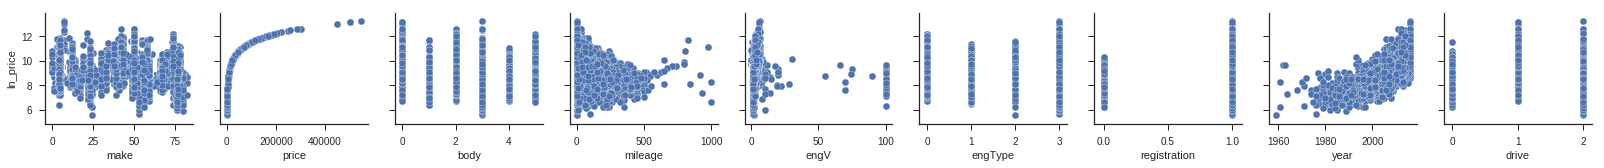

In [18]:
sns.set(style="ticks", color_codes=True)

# Generating list of column headers, except for ln_price
x_columns = df.columns.drop('ln_price')

# Plotting scatterplot of x variables with our y variable only
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns)

## 2.3 If appropriate, create any polynomial features. 

In [0]:
# Squaring year because it looks like it could be a good polynomial feature
df['year_squared'] = df['year'] ** 2

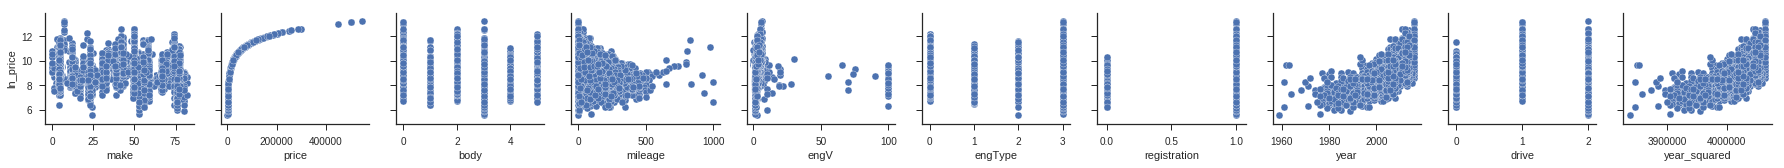

In [21]:
# Running another 'eyeball test' to see what the year_squared feature looks like
sns.set(style="ticks", color_codes=True)

# Generating list of column headers, except for ln_price
x_columns = df.columns.drop('ln_price')

# Plotting scatterplot of x variables with our y variable only
sns.pairplot(data=df, y_vars=['ln_price'], x_vars=x_columns)

## 2.4 Use the new log-transformed y variable and your x variables (including any new polynomial features) to fit a new linear regression model. Then report the: intercept, coefficients, RMSE, and $R^2$.

In [22]:
# Getting list of columns
df.columns

Index(['make', 'price', 'body', 'mileage', 'engV', 'engType', 'registration',
       'year', 'drive', 'ln_price', 'year_squared'],
      dtype='object')

In [27]:
# Adding squared X feature
X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'drive',
        'year','year_squared']]

# Using log price
y = df['ln_price']

# Splitting data
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=.2, random_state=42)

# Fitting model to training data
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [28]:
# Making variables for coefficients and intercept
beta_i = model.coef_
beta_0 = model.intercept_

# Printing results
print("Coefficients: \n", beta_i)
print("\n Intercept: ", beta_0)

Coefficients: 
 [-1.69063291e-03 -9.39572722e-02  6.77678823e-04  8.23353557e-03
 -4.85002366e-02  6.71639900e-01  3.73889221e-01 -6.07868803e+00
  1.54364627e-03]

 Intercept:  5990.619369451471


In [29]:
# Using model function to predict y values using X_test dataset
y_test_predict = model.predict(X_test)

# Calculating RMSE and R^2
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
R2 = r2_score(Y_test, y_test_predict)

# Showing results
print("RMSE:", RMSE)
print("R2:", R2)

RMSE: 0.5628544021513837
R2: 0.6694314006573964


## 2.5 How might we interpret the coefficient on "year" in this new regression model?

In the new regression model, the 'year' feature coefficient is approximately -6. With the price now in log form, the coefficients can be interpreted as percents, instead of dollars. The -6 coefficient for 'year' is counterintuitive to me. It tells us that a 1 year increase decreases the price by 6%.

# Gradient Descent

## 3.1 What does Gradient Descent seek to minimize?

Gradient Descent seeks to minimize the cost function (i.e. error), which is a comparison between our hypothesis regression and our actual y values. In other words, Gradient Descent looks to minimize error by finding the lowest point in the cost function.

## 3.2 What is the "Learning Rate" and what is its function?

If we think of Gradient Descent as a hiker trying to find the lowest point within a landscape, the initial step size that the hiker takes would be the Learning Rate. However, because the Learning Rate (step size) is multiplied by gradient (slope) in the gradient descent equation, the Learning Rate shrinks as it gets closer to the minimum point. Also, the Learning Rate must be set appropriately. If it's set too small, we may not reach the minimum point. But if it's set too high, we may skip over the minimum point.

# Model Diagnostics

## 4.1 Use statsmodels to run a log-linear or log-polynomial linear regression with robust standard errors.

In [0]:
# Using variables for log-polynomial linear regression

X = df[['make', 'body', 'mileage', 'engV', 'engType', 'registration', 'drive',
        'year','year_squared']]

y = df['ln_price']

In [32]:
# Adding vector of ones to X
X = sm.add_constant(X)

# Fitting statsmodels OLS model to data
ols_model = sm.OLS(y, X).fit(cov_type='HC3') # Using robust std errors with "cov_type='HC3'" parameter
predictions = ols_model.predict(X)

# Printing model summary
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:               ln_price   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     1870.
Date:                Fri, 22 Feb 2019   Prob (F-statistic):               0.00
Time:                        17:39:08   Log-Likelihood:                -6964.2
No. Observations:                8495   AIC:                         1.395e+04
Df Residuals:                    8485   BIC:                         1.402e+04
Df Model:                           9                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         6418.6476    624.441     10.279   

## 4.2 Calculate the Variance Inflation Factor (VIF) of our X variables. Do we have multicollinearity problems?

In [33]:
# Printing X columns for easy reference
print(X.columns, '\n\n')

# Calculating VIF for every feature in X
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Printing VIF results
print(vif)

Index(['const', 'make', 'body', 'mileage', 'engV', 'engType', 'registration',
       'drive', 'year', 'year_squared'],
      dtype='object') 


[2953273039.000897, 1.0604314751619541, 1.1583527741914696, 1.9368892032943774, 1.0100376419582862, 1.1547598212320087, 1.108514698220217, 1.1396338223459779, 141693.16571434424, 141937.91485709895]


In [34]:
# Looking at correlation to confirm high collinearity between year and year_squared
X.corr()

,const,make,body,mileage,engV,engType,registration,drive,year,year_squared
const,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
make,NaN,1.000000,0.026127,-0.035097,-0.021246,-0.011880,0.104557,-0.196444,-0.013833,-0.013679
body,NaN,0.026127,1.000000,0.287060,-0.025320,-0.184007,-0.082643,-0.162235,-0.154554,-0.154919
mileage,NaN,-0.035097,0.287060,1.000000,0.042081,-0.229644,-0.229354,0.067962,-0.503135,-0.504345
engV,NaN,-0.021246,-0.025320,0.042081,1.000000,-0.004896,-0.015274,0.084756,-0.041076,-0.041024
engType,NaN,-0.011880,-0.184007,-0.229644,-0.004896,1.000000,0.152988,-0.044859,-0.040471,-0.040323
registration,NaN,0.104557,-0.082643,-0.229354,-0.015274,0.152988,1.000000,-0.055793,0.185104,0.185613
drive,NaN,-0.196444,-0.162235,0.067962,0.084756,-0.044859,-0.055793,1.000000,-0.169709,-0.169444
year,NaN,-0.013833,-0.154554,-0.503135,-0.041076,-0.040471,0.185104,-0.169709,1.000000,0.999995
year_squared,NaN,-0.013679,-0.154919,-0.504345,-0.041024,-0.040323,0.185613,-0.169444,0.999995,1.000000


Both 'year' and 'year_squared' have VIFs much higher than 10, which means they are collinear. We can also see their collinearity by the very high correlation between the two features. This can cause problems, such as causing standard errors to increase drastically. These variables will need to be dealt with (dropped) to create a better regression model.